In [16]:
import cv2
import numpy as np
import os



class ColorSpaces:
    """mainly we tend to convert from BGR->Gray and BGR-> HSV"""
    

    def __init__(self, path):
        self.image_path = path
        self.image = cv2.imread(self.image_path)

    def convert_bgr_hsv(self):
        """converts bgr image to hsv"""
        hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
        cv2.imwrite(os.path.join("bgr2hsv.jpg"), hsv)

    def convert_bgr_gray(self):
        """converts bgr image to gray"""

        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join("bgr2gray.jpg"), gray)

    def track_blue(self):
        """tracks blue color,first convert into hsv and then we go bitwise and to detect the blue"""
        hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)

        low_blue = np.array([25, 50, 50])
        up_blue = np.array([130, 255, 255])

        # Threshold the HSV image to get blue colors only
        mask = cv2.inRange(hsv, low_blue, up_blue)
        # Bitwise-AND mask and original image
        re = cv2.bitwise_and(self.image, self.image, mask=mask)
        cv2.imwrite(os.path.join("detected_blue.jpg"), re)

In [17]:
# # color spaces and changing color spaces
# # check all color spaces
# check_color_spaces()
image_path_src = os.path.join("blue_cap.jpg")
color_spaces_obj = ColorSpaces(image_path_src)
color_spaces_obj.convert_bgr_gray()
color_spaces_obj.convert_bgr_hsv()
color_spaces_obj.track_blue()

In [18]:
import matplotlib.pyplot as plt
def plt_imshow(image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.grid(False)
	plt.show()

In [19]:
image0 = cv2.imread("blue_cap.jpg")
image1 = cv2.imread("detected_blue.jpg")
image2 = cv2.imread("bgr2gray.jpg")
image3 = cv2.imread("bgr2hsv.jpg")

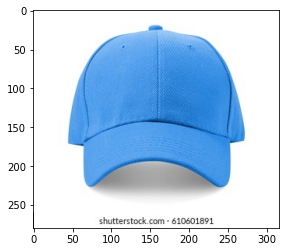

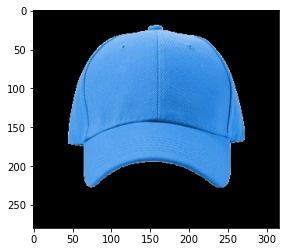

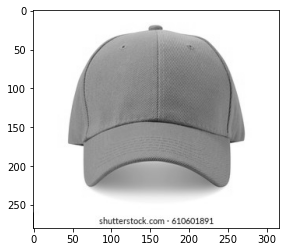

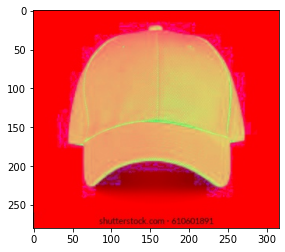

In [20]:
plt_imshow(image0)
plt_imshow(image1)
plt_imshow(image2)
plt_imshow(image3)